# **1. Perkenalan Dataset**


**Sumber Dataset**:  https://www.kaggle.com/datasets/ritwikb3/heart-disease-statlog?resource=download

## Konteks
Dataset yang digunakan adalah Statlog Heart Disease yang diambil dari repositori UCI. Dataset ini berisi data dari 270 individu. Terdapat 14 kolom dalam dataset ini (yang telah diekstrak dari kumpulan data yang lebih besar, yaitu 75 kolom). Tidak ada nilai yang hilang (missing values). Tugas klasifikasi adalah untuk memprediksi apakah seseorang menderita penyakit jantung atau tidak.
Nilai target:

0: tidak menderita penyakit jantung (absence)

1: menderita penyakit jantung (presence)

Data asli:
https://archive.ics.uci.edu/ml/datasets/statlog+(heart)

## Isi Dataset
Database ini terdiri dari 13 atribut dan 1 variabel target. Terdiri dari 8 nilai nominal dan 5 nilai numerik. Deskripsi rinci setiap fitur sebagai berikut:

- age: Usia pasien dalam tahun (Numerik)

- sex: Jenis kelamin (Laki-laki: 1; Perempuan: 0) 

- cp (chest pain): Jenis nyeri dada yang dialami pasien, terbagi menjadi 4 kategori:

      0: angina tipikal

      1: angina atipikal

      2: nyeri non-angina

      3: asimptomatik
      

- trestbps: Tekanan darah saat istirahat dalam mm/HG (Numerik)

- chol: Kadar kolesterol serum dalam mg/dl (Numerik)

- fbs (fasting blood sugar): Kadar gula darah puasa > 120 mg/dl

      1: benar

      0: salah
      

- restecg: Hasil elektrokardiogram saat istirahat, memiliki 3 nilai:

      0: Normal

      1: Kelainan gelombang ST-T (inversi T dan/atau elevasi atau depresi ST > 0.05 mV)

      2: Hipertrofi ventrikel kiri berdasarkan kriteria Estes
      

- thalach: Detak jantung maksimum yang dicapai (Numerik)

- exang: Angina yang diinduksi oleh olahraga

      0: Tidak

      1: Ya
      

- oldpeak: Depresi ST yang diinduksi oleh olahraga relatif terhadap kondisi istirahat (Numerik)

- slope: Kemiringan segmen ST selama puncak olahraga

      0: naik (upsloping)

      1: datar (flat)

      2: turun (downsloping)
      

- ca: Jumlah pembuluh darah besar (0–3) yang terlihat melalui fluoroskopi 

- thal: Gangguan darah yang disebut thalassemia

      0: NULL

      1: Aliran darah normal

      2: Cacat tetap (tidak ada aliran darah di sebagian jantung)

      3: Cacat reversibel (ada aliran darah tetapi tidak normal)
      

- target: Variabel target yang harus diprediksi

      0: Tidak menderita penyakit jantung

      1: Menderita penyakit jantung

Variabel yang Diprediksi
Apakah seseorang tidak menderita (0) atau menderita (1) penyakit jantung.


## Ucapan Terima Kasih
Beberapa publikasi yang mengutip penggunaan dataset ini:

- Gavin Brown. Diversity in Neural Network Ensembles. University of Birmingham, 2004.

- Igor Kononenko, Edvard Simec, Marko Robnik-Sikonja. Overcoming the Myopia of Inductive Learning Algorithms with RELIEFF. Appl. Intell, 7. 1997.

- Alexander K. Seewald. Dissertation Towards Understanding Stacking Studies of a General Ensemble Learning Scheme.

- Elena Smirnova, Ida G. Sprinkhuizen-Kuyper, I. Nalbantis, ERIM, Universiteit Rotterdam. Unanimous Voting using Support Vector Machines. IKAT, Universiteit Maastricht.


# **2. Import Library**

In [1]:
# Manipulasi dan Analisis Data
import pandas as pd
import numpy as np


# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns


# Pra-pemrosesan & Evaluasi
from sklearn.preprocessing import StandardScaler


# Utilities
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

In [2]:
# Memuat dataset Heart_disease_statlog.csv
df = pd.read_csv('../Heart_disease_statlog.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [5]:
# Cek missing values (NA) dan data duplikat
print("Jumlah missing values tiap kolom:")
print(df.isna().sum())
print("\nJumlah data duplikat:", df.duplicated().sum())

Jumlah missing values tiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Jumlah data duplikat: 0


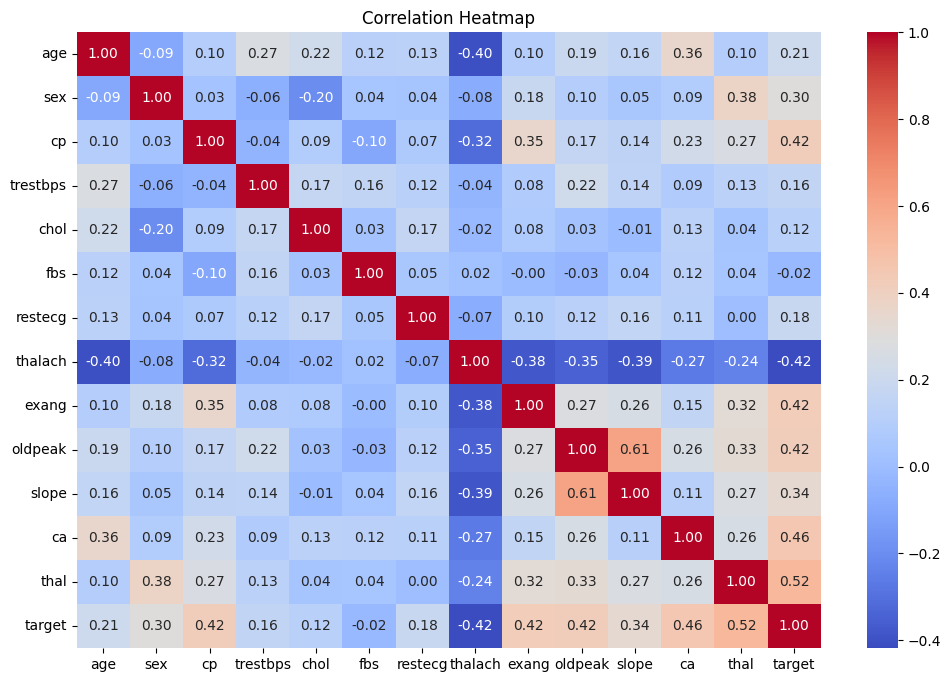

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

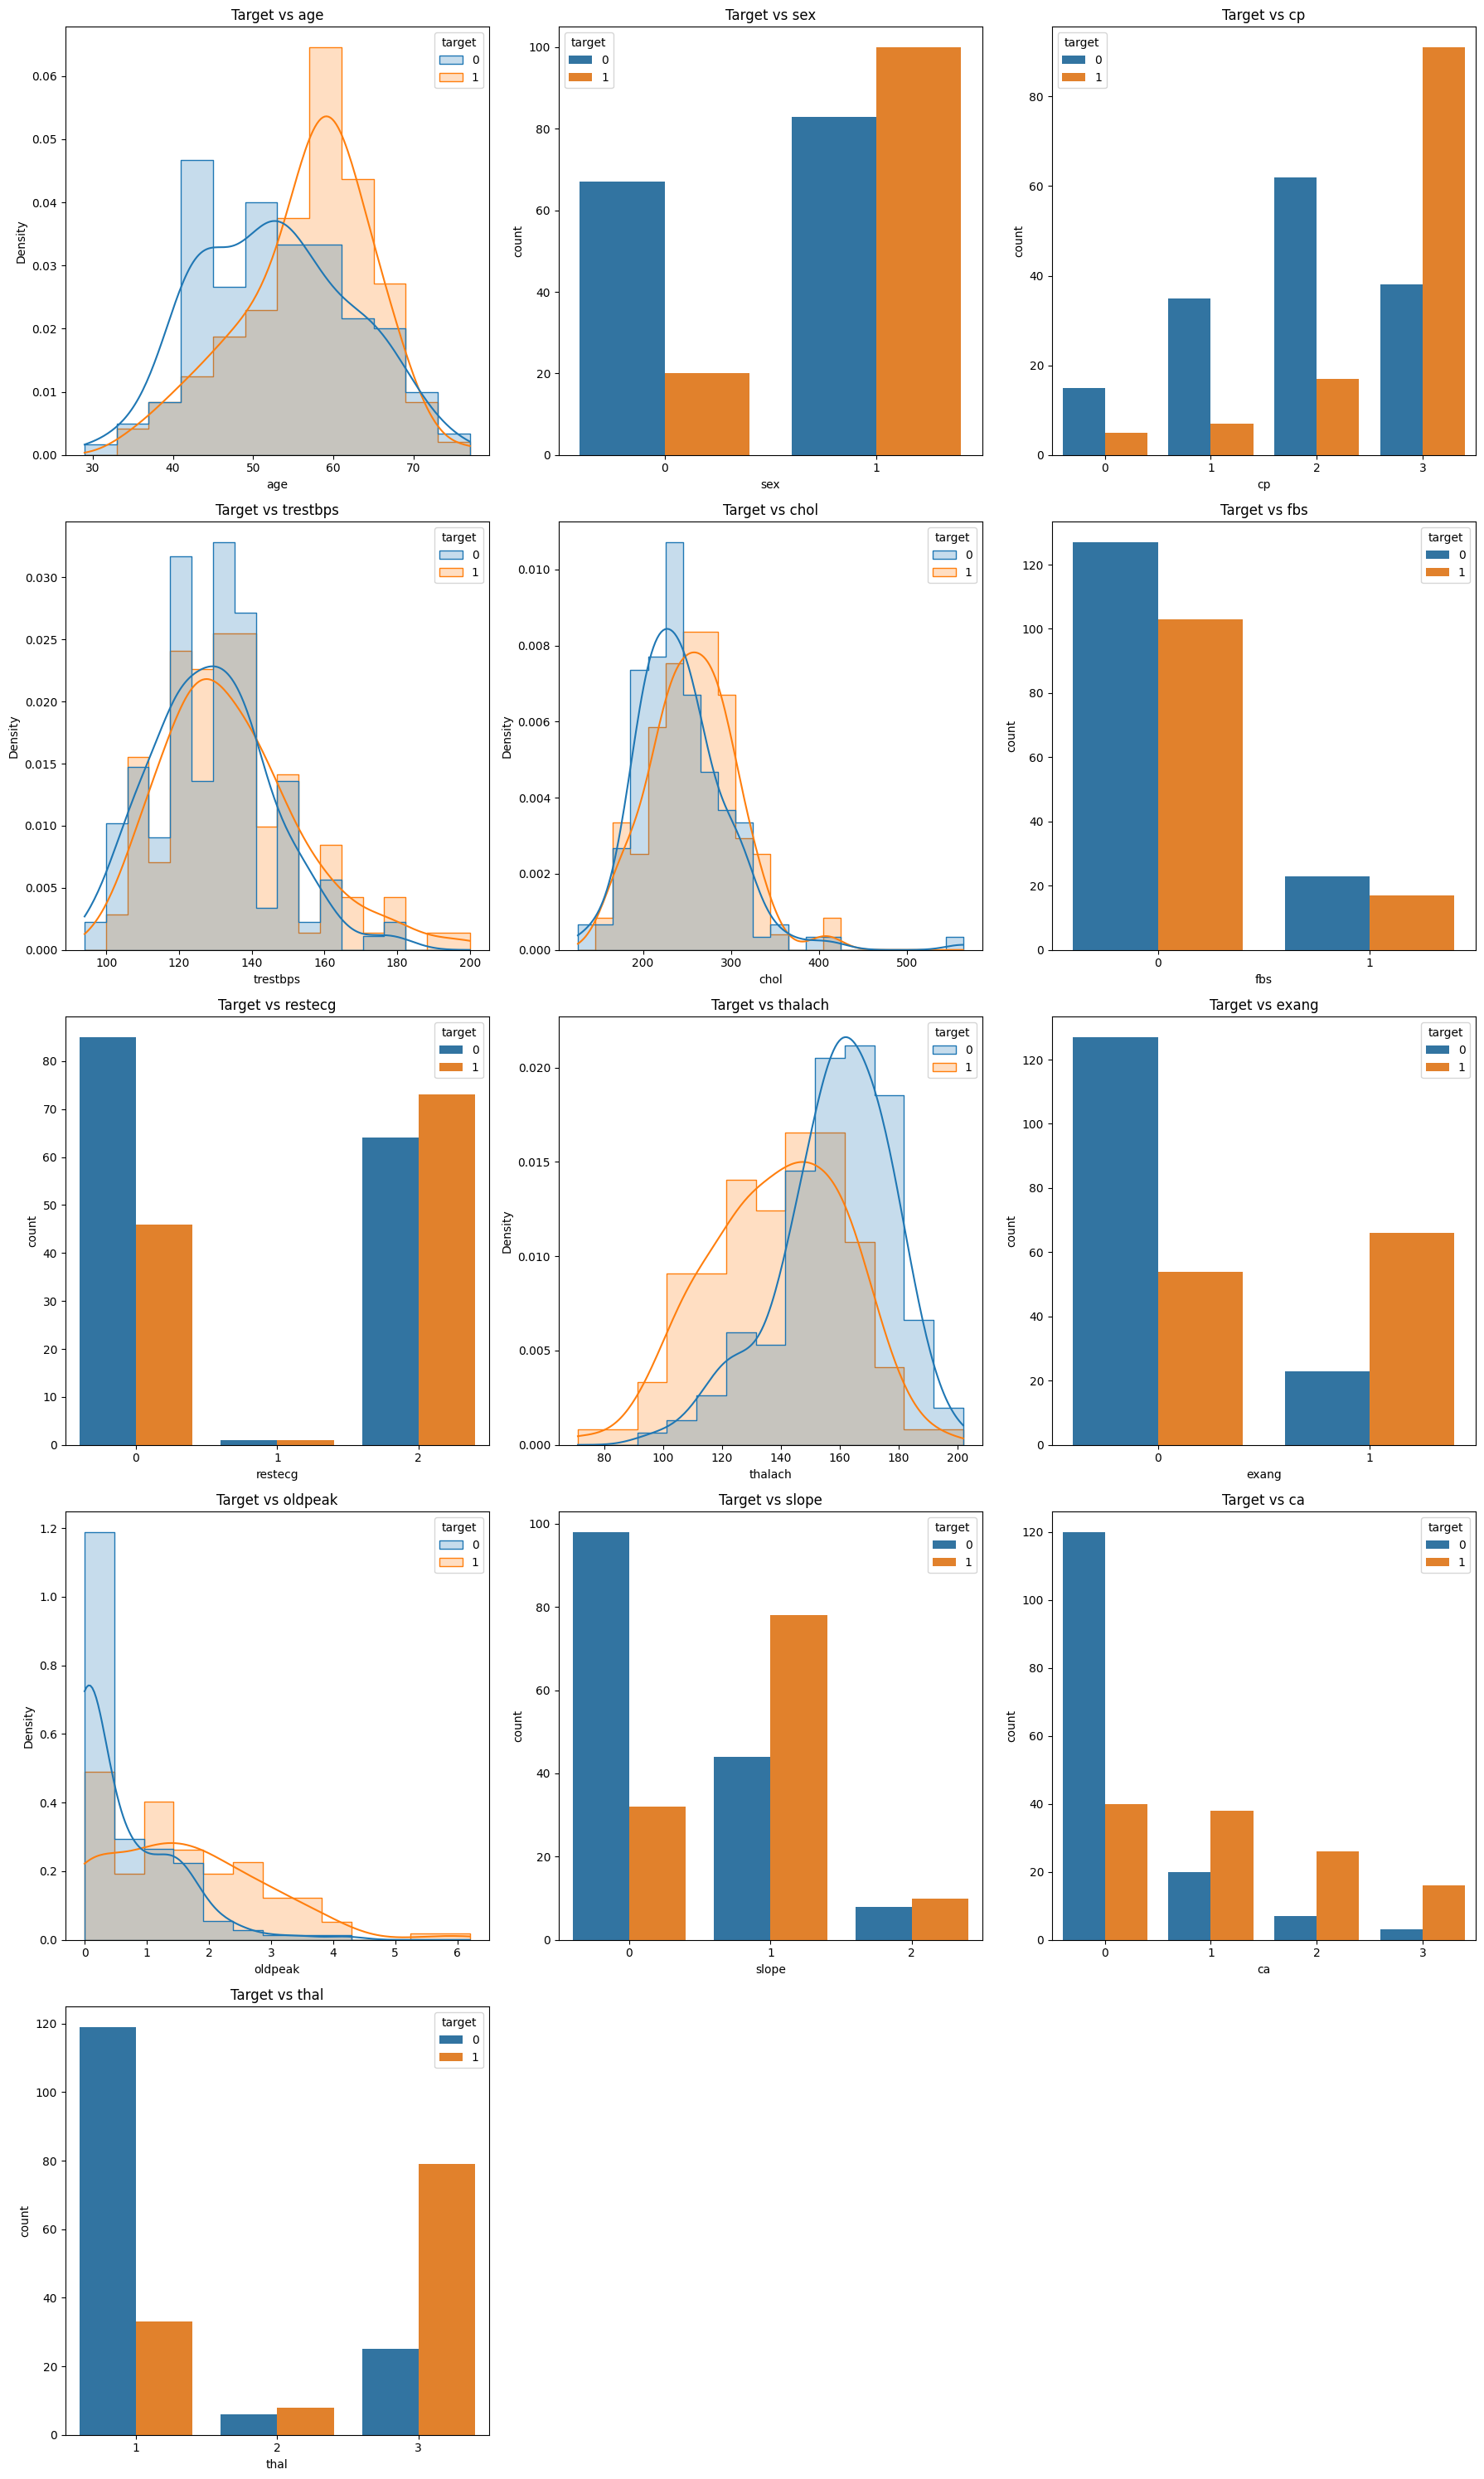

In [7]:
# Membuat plot distribusi target terhadap setiap fitur
features = [col for col in df.columns if col != 'target']
plt.figure(figsize=(18, 30))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 3, i)
    if df[feature].nunique() <= 10:
        sns.countplot(x=feature, hue='target', data=df)
    else:
        sns.histplot(data=df, x=feature, hue='target', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Target vs {feature}')
plt.tight_layout()
plt.show()

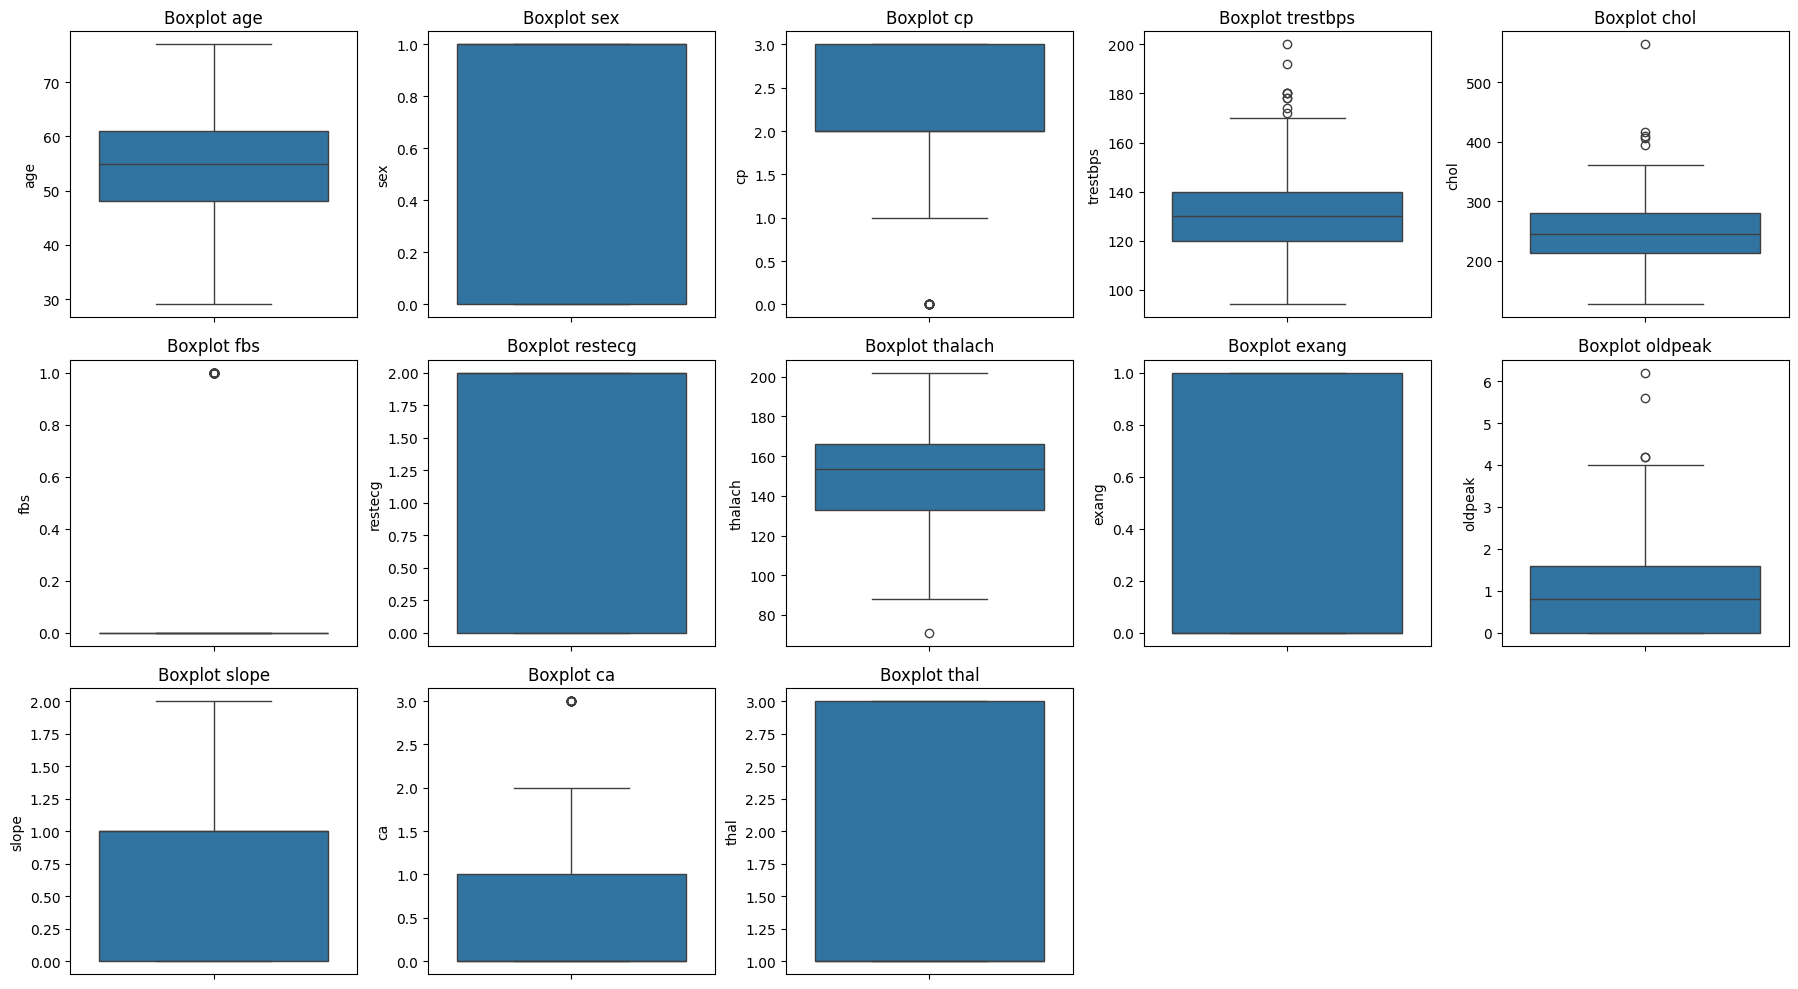

In [8]:
# Menggunakan boxplot untuk mendeteksi outlier pada setiap fitur numerik
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('target')

plt.figure(figsize=(18, 10))
for idx, col in enumerate(numerical_features, 1):
    plt.subplot(3, 5, idx)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [9]:
# Capping outlier untuk fitur 'trestbps', 'chol', 'thalach', dan 'oldpeak' menggunakan IQR
capping_features = ['trestbps', 'chol', 'thalach', 'oldpeak']

for feature in capping_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_cap, lower_cap,
                           np.where(df[feature] > upper_cap, upper_cap, df[feature]))

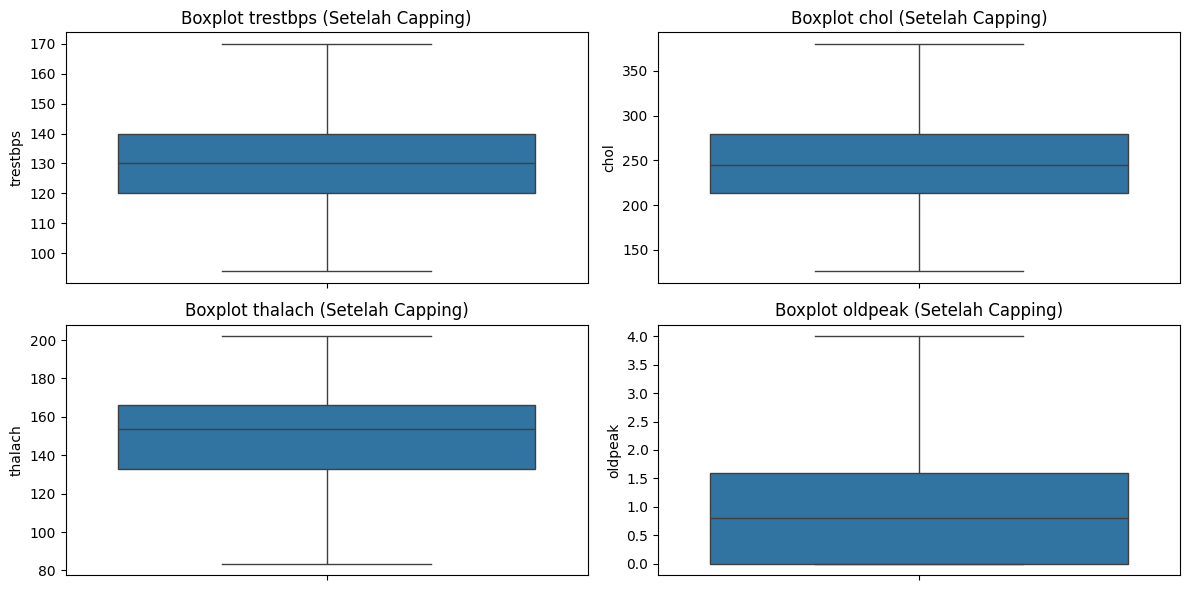

In [10]:
# Mengecek outlier pada fitur yang telah dicapping menggunakan boxplot
plt.figure(figsize=(12, 6))
for idx, feature in enumerate(capping_features, 1):
    plt.subplot(2, 2, idx)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot {feature} (Setelah Capping)')
plt.tight_layout()
plt.show()

In [11]:
# Standarisasi fitur numerik yang sebelumnya diplot menggunakan density (bukan count)
density_features = [col for col in features if df[col].nunique() > 10]

scaler = StandardScaler()
df[density_features] = scaler.fit_transform(df[density_features])

df[density_features].head()

,age,trestbps,chol,thalach,oldpeak
0,1.712094,-0.057210,1.549364,-1.772364,1.253423
1,1.382140,-0.951808,2.784055,0.447222,0.519115
2,0.282294,-0.415049,0.261908,-0.379683,-0.674136
3,1.052186,-0.176490,0.304119,-1.946450,-0.765924
4,2.152032,-0.653609,0.430754,-1.250109,-0.765924


In [13]:
# Simpan dataframe hasil olahan ke file CSV baru
df.to_csv('HDS_preprocessing.csv', index=False)